In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/b38c5f7c55055431bbfcd673555a5898/asset-v1:hse+STATDA+2021+type@asset+block/ScrabbleGames.csv')
df.head()

,gameid,tourneyid,tie,winnerid,winnername,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,losername,loserscore,loseroldrating,losernewrating,loserpos,round,division,date,lexicon,year
0,451519,1590,0,38,Matt Laufer,0,1892,1877,5,608,Pam Grazette,0,1712,1692,14,1,1,1994-03-11,0,1994
1,451520,1590,0,38,Matt Laufer,0,1892,1877,5,82,Sally Ricketts,0,1390,1347,36,3,1,1994-03-11,0,1994
2,451521,1590,0,38,Matt Laufer,0,1892,1877,5,4001,James Guillot,0,1712,1700,22,5,1,1994-03-11,0,1994
3,451522,1590,0,38,Matt Laufer,0,1892,1877,5,5676,Rhoda Squires,0,1642,1591,29,8,1,1994-03-11,0,1994
4,451523,1590,0,38,Matt Laufer,0,1892,1877,5,4001,James Guillot,0,1712,1700,22,9,1,1994-03-11,0,1994


<B>Описание данных</B>
<br>– gameid — номер игры в скрэббл
<br>– tourneyid — номер турнира
<br>– tie — игра закончилась вничью
<br>– winnerid — порядковый номер победителя
<br>– winnername — имя победителя
<br>– winnerscore — набранные победителем очки
<br>– winneroldrating — рейтинг победителя до игры
<br>– winnernewrating — рейтинг победителя после игры
<br>– winnerpos — место победителя в турнире
<br>– loserid — порядковый номер проигравшего
<br>– loserscore — набранные проигравшем очки
<br>– loseroldrating — рейтинг проигравшего до игры
<br>– losernewrating — рейтинг проигравшего после игры
<br>– loserpos — место проигравшего в турнире
<br>– round — раунд турнира, в котором проходила игра
<br>– division — дивизион турнира, в котором проходила игра
<br>– date — дата игры
<br>– lexicon — набор слов, который использовался в игре (международный – 1; характерный для Северной Америки – 0)
<br>– year — год

<H3>Вопрос 1</H3>Сгруппируйте датафрейм по переменной tourneyid, затем определите тип взаимосвязи между средними значениями переменных winnerscore и winnernewrating. 

In [3]:
tourney_score = df.groupby('tourneyid').agg({'winnerscore': 'mean', 'winnernewrating': 'mean'})

In [4]:
tourney_score.head()

,winnerscore,winnernewrating
tourneyid,,
1524,0.000000,1607.119701
1590,0.000000,1446.150134
1591,4.287538,1459.314096
1592,0.000000,1384.846262
1593,0.000000,1115.964246


In [5]:
tourney_score['winnerscore'].corr(tourney_score['winnernewrating'])

-0.6040132147335744

In [6]:
tourney_score = tourney_score.drop(tourney_score.loc[tourney_score['winnerscore'] > 300].index, axis=0)

<Axes: xlabel='winnerscore', ylabel='winnernewrating'>

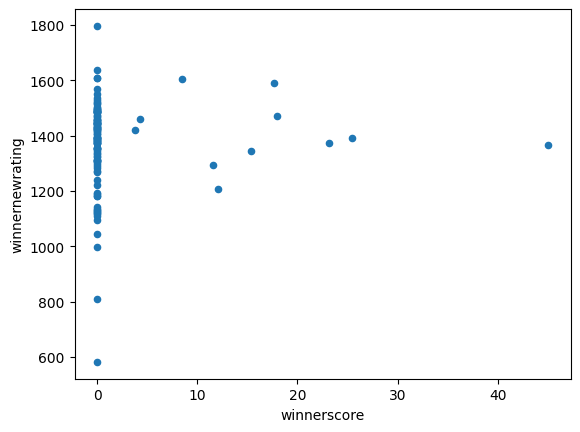

In [7]:
tourney_score.plot(kind='scatter', x='winnerscore', y='winnernewrating')

<H3>Вопрос 2.</H3>Укажите, верно ли следующее утверждение: очки, набранные победителем, напрямую и сильно зависят от очков, набранных проигравшим. Сгруппируйте датафрейм по переменной tourneyid и посмотрите на средние значения интересующих нас переменных.

In [8]:
tourney_group = df.groupby('tourneyid').agg({'winnerscore': 'mean', 'loserscore': 'mean'})
tourney_group.head()

,winnerscore,loserscore
tourneyid,,
1524,0.000000,0.000000
1590,0.000000,0.000000
1591,4.287538,3.360572
1592,0.000000,0.000000
1593,0.000000,0.000000


<Axes: xlabel='loserscore', ylabel='winnerscore'>

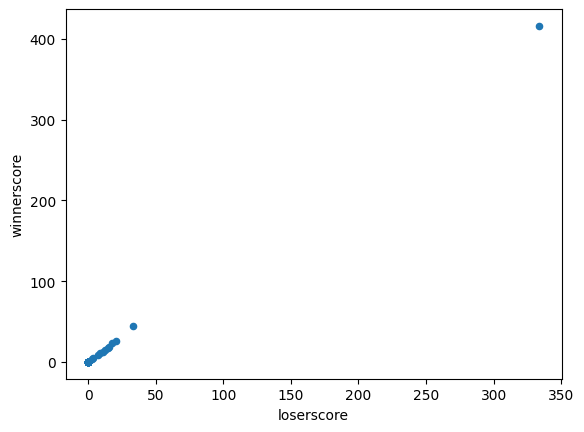

In [9]:
tourney_group.plot(kind='scatter', x='loserscore', y='winnerscore')

<H3>Вопрос 3.</H3>Сгруппируйте датафрейм по переменной tourneyid, затем рассчитайте коэффициент корреляции между средними значениями переменных winnernewrating и losernewrating. Введите ответ в виде десятичной дроби, округлите до двух знаков после запятой (например, 0.23); если связь обратная, не забудьте указать минус перед числом.

In [10]:
t_gr = df.groupby('tourneyid').agg({'winnernewrating': 'mean', 'losernewrating': 'mean'})
t_gr['winnernewrating'].corr(t_gr['losernewrating'])

0.9783569191327567

<Axes: xlabel='losernewrating', ylabel='winnernewrating'>

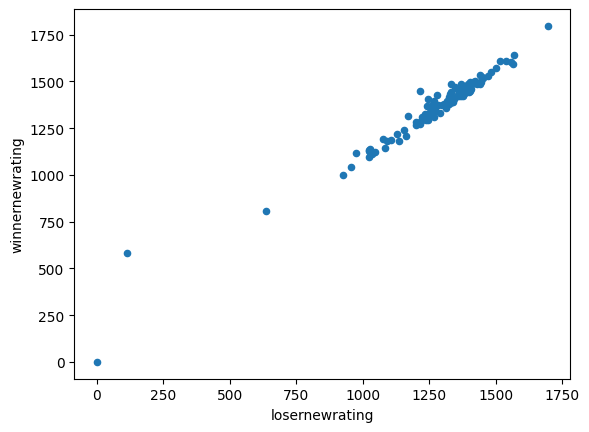

In [11]:
t_gr.plot(kind='scatter', x='losernewrating', y='winnernewrating')

<H3>Вопрос 4.</H3>Выберите только первые раунды турнира, сгруппируйте датафрейм по переменной tourneyid, затем рассчитайте коэффициент корреляции между переменными winnerscore и loserscore. Введите ответ в виде десятичной дроби, до двух знаков после запятой (например, 0.29); если связь обратная, не забудьте указать минус перед числом.

In [12]:
select = df[df['round'] == 1]
select.groupby('tourneyid')[['winnerscore', 'loserscore']].mean()

,winnerscore,loserscore
tourneyid,,
1524,0.000000,0.000000
1590,0.000000,0.000000
1591,3.707547,3.084906
1592,0.000000,0.000000
1593,0.000000,0.000000
...,...,...
4380,0.000000,0.000000
4381,0.000000,0.000000
5465,0.000000,0.000000


In [13]:
select['loserscore'].corr(select['winnerscore'])

0.992563389928811

<H3>Вопрос 5.</H3>Укажите, верно ли следующее утверждение: переменная tie не влияет на характер взаимосвязи между переменными winnernewrating и losernewrating. Сгруппируйте датафрейм по переменной tourneyid, затем рассчитайте коэффициент корреляции между средними значениями указанных переменных.

In [14]:
a = df.groupby('tourneyid').agg({'winnernewrating': 'mean', 'losernewrating': 'mean', 'tie': 'count'})
a.head()

,winnernewrating,losernewrating,tie
tourneyid,,,
1524,1607.119701,1515.289277,401
1590,1446.150134,1332.498660,373
1591,1459.314096,1399.556691,1958
1592,1384.846262,1315.502116,709
1593,1115.964246,974.653631,895


In [15]:
a.corr()

,winnernewrating,losernewrating,tie
winnernewrating,1.000000,0.978357,0.184417
losernewrating,0.978357,1.000000,0.203838
tie,0.184417,0.203838,1.000000


<H3>Вопрос 6.</H3>Выберите самого часто встречающегося победителя (столбец winnername). Сгруппируйте датафрейм по переменной tourneyid, затем рассчитайте коэффициент корреляции между средними значениями переменных winnerscore и winneroldrating. Введите ответ в виде десятичной дроби, округлите до двух знаков после запятой; если связь обратная, не забудьте указать минус перед числом.

In [16]:
best_player = df['winnername'].value_counts().index[0]
best_player

'Lester Schonbrun'

In [17]:
b = df[df['winnername'] == best_player].groupby('tourneyid').agg({'winnerscore': 'mean', 'winneroldrating': 'mean'})
b.corr()

,winnerscore,winneroldrating
winnerscore,1.000000,0.052294
winneroldrating,0.052294,1.000000


<H3>Вопрос 7.</H3>Укажите, верно ли следующее утверждение: характер взаимосвязи (прямая или обратная) между средними значениями переменных winnerscore и winneroldrating для победителя по имени Lester Schonbrun не отличается для такого же показателя для победителя по имени Stuart Goldman. Сгруппируйте датафрейм по переменной tourneyid, затем рассчитайте коэффициент корреляции между средними значениями указанных переменных.

In [18]:
c = df[df['winnername'] == 'Stuart Goldman'].groupby('tourneyid').agg({'winnerscore': 'mean', 'winneroldrating': 'mean'})
c.corr()

,winnerscore,winneroldrating
winnerscore,1.000000,-0.498531
winneroldrating,-0.498531,1.000000


<H3>Вопрос 8.</H3>Выберите данные только за 4376 турнир (переменная tourneyid). Рассчитайте коэффициент корреляции между переменными winnerscore и loserscore. Введите ответ в виде десятичной дроби, округлите до двух знаков после запятой; если связь обратная, не забудьте указать минус перед числом.

In [19]:
d = df[df['tourneyid'] == 4376]
d['winnerscore'].corr(d['loserscore'])

-0.24900080522596177

<H2>Визуализация данных</H2>

In [20]:
bikes = pd.read_pickle('https://courses.openedu.ru/assets/courseware/v1/ad70c3f277d672a12d0a7af382e91394/asset-v1:hse+STATDA+2021+type@asset+block/BikesDataImputed.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [21]:
month_weather = bikes.groupby(bikes['Date'].dt.month)['Temperature'].mean()
month_weather

Date
1     -3.957460
2     -1.677009
3      8.049597
4     12.970278
5     18.129368
6     23.134375
7     27.766062
8     28.719556
9     21.490208
10    13.095161
11     7.785069
12    -1.932594
Name: Temperature, dtype: float64

<BarContainer object of 12 artists>

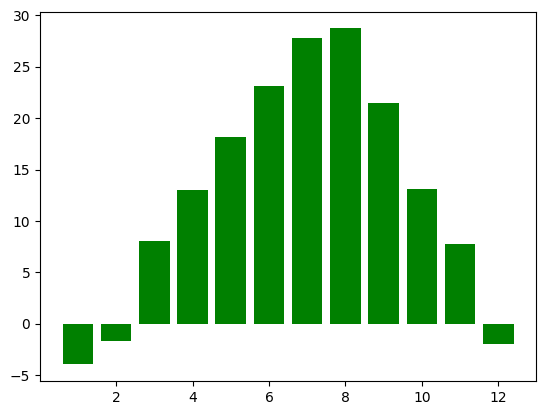

In [22]:
plt.bar(month_weather.index, month_weather, color='green')

<BarContainer object of 12 artists>

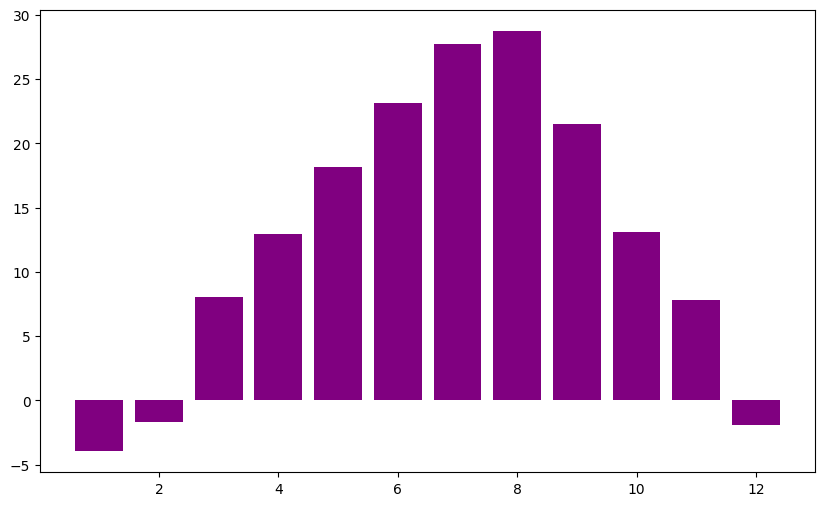

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(month_weather.index, month_weather, color='purple')

In [24]:
bikes_weekly = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()
bikes_weekly.head()

week
1    39441
2    30871
3    42193
4    23079
5    28415
Name: Rental Count, dtype: int64

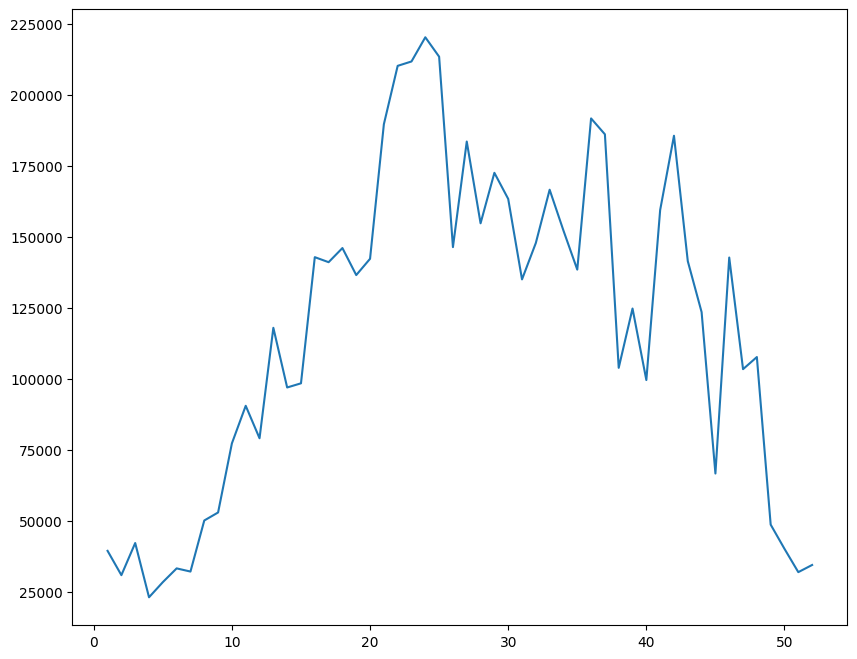

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(bikes_weekly)

In [26]:
by_seasons = bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()
by_seasons

Seasons  Date      
Autumn   2018-09-01    25495
         2018-09-02    33943
         2018-09-03    10753
         2018-09-04    31363
         2018-09-05    34816
                       ...  
Winter   2018-02-24     6286
         2018-02-25     5780
         2018-02-26     9133
         2018-02-27     8923
         2018-02-28     3663
Name: Rental Count, Length: 365, dtype: int64

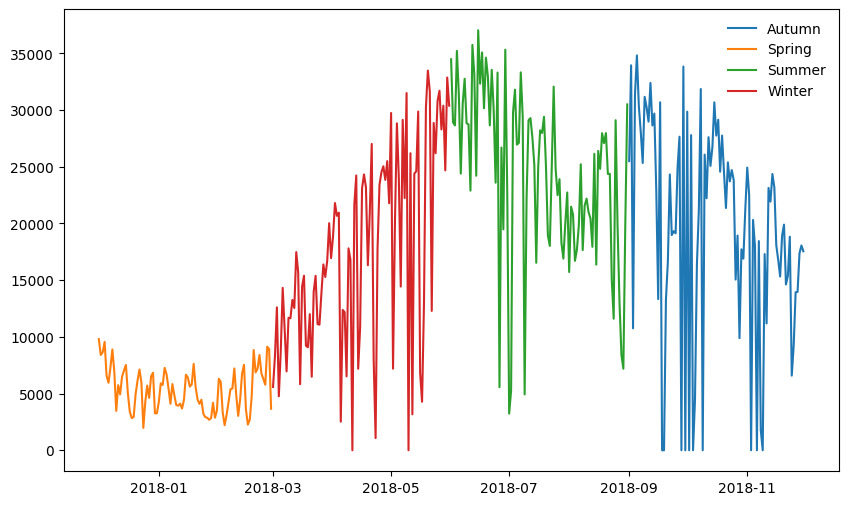

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(by_seasons['Autumn'])
ax.plot(by_seasons['Winter'])
ax.plot(by_seasons['Summer'])
ax.plot(by_seasons['Spring'])
ax.legend(by_seasons.index.get_level_values(level='Seasons').unique(), frameon=False)

In [28]:
daily_temp = bikes.groupby(['Seasons', 'Date'])['Temperature'].mean()
daily_temp

Seasons  Date      
Autumn   2018-09-01    25.402083
         2018-09-02    24.987500
         2018-09-03    23.604167
         2018-09-04    23.254167
         2018-09-05    23.783333
                         ...    
Winter   2018-02-24     2.762500
         2018-02-25     1.916667
         2018-02-26     2.725000
         2018-02-27     3.958333
         2018-02-28     4.850000
Name: Temperature, Length: 365, dtype: float64

Text(0.5, 0.98, 'Temperature daily means by season')

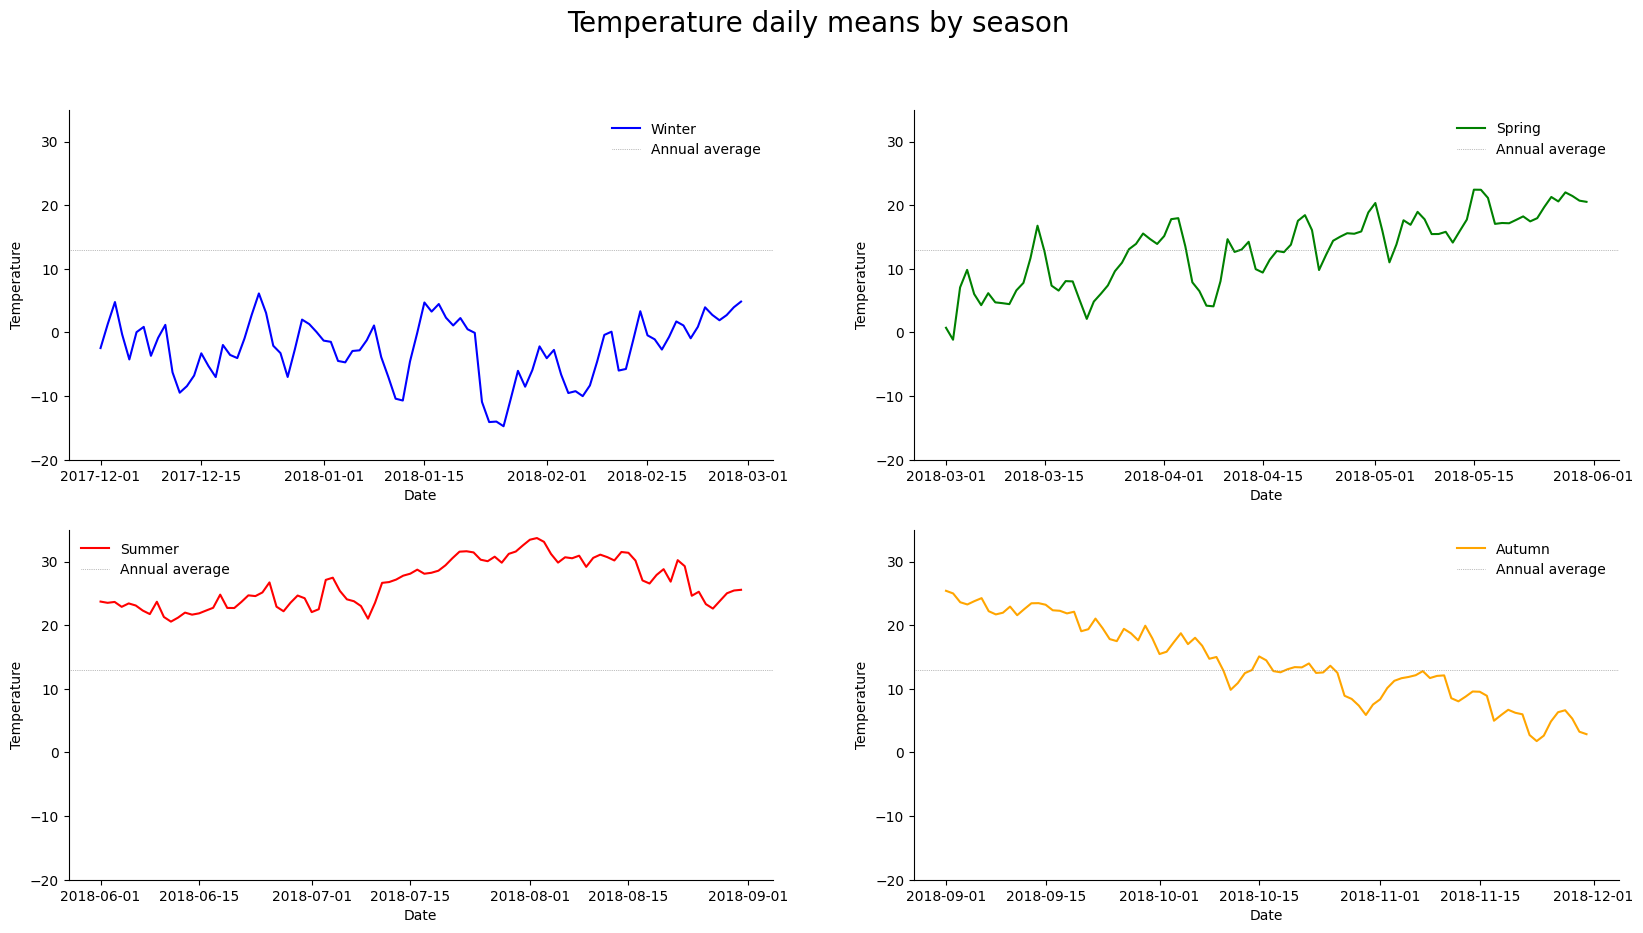

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
ax[0][0].plot(daily_temp['Winter'], color='blue')
ax[0][1].plot(daily_temp['Spring'], color='green')
ax[1][0].plot(daily_temp['Summer'], color='red')
ax[1][1].plot(daily_temp['Autumn'], color='orange')

for axis in ax.ravel():
    axis.set_ylim(-20,35)
    axis.set_xlabel('Date')
    axis.set_ylabel('Temperature')
    axis.axhline(bikes['Temperature'].mean(), c='grey', lw=0.5, ls=':') #lw - line width, ls - line style
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    
ax[0][0].legend(['Winter', 'Annual average'], frameon=False)    
ax[0][1].legend(['Spring', 'Annual average'], frameon=False)    
ax[1][0].legend(['Summer', 'Annual average'], frameon=False)    
ax[1][1].legend(['Autumn', 'Annual average'], frameon=False)  

fig.suptitle('Temperature daily means by season', fontsize=20)

In [30]:
fig.savefig('temperatures.pdf')

In [31]:
bikes['No_work_day'] = np.where(bikes['Date'].dt.day_name().isin(['Saturday', 'Sunday']) + bikes['Holiday'], 1, 0) 
#selecting holidays and weekends from dataframe, assigning 0 to work-days and 1 to holidays

In [32]:
bikes['Precipitation'] = bikes['Rainfall'] * 10 + bikes['Snowfall']

In [33]:
bikes_sum = bikes.groupby('Date')['Rental Count'].sum()
temp_av = bikes.groupby('Date')['Temperature'].mean()
precipitation_mean = bikes.groupby('Date')['Precipitation'].mean()
no_work = bikes.groupby('Date')['No_work_day'].max()

bikes_date = pd.concat([bikes_sum, temp_av, precipitation_mean, no_work], axis=1)
bikes_date

,Rental Count,Temperature,Precipitation,No_work_day
Date,,,,
2017-12-01,9802,-2.454167,0.000000,0
2017-12-02,8404,1.320833,0.000000,1
2017-12-03,8644,4.777083,1.666667,1
2017-12-04,9556,-0.304167,0.041667,0
2017-12-05,6578,-4.241667,0.000000,0
...,...,...,...,...
2018-11-26,13934,6.320833,0.120833,0
2018-11-27,13964,6.631250,0.000000,0
2018-11-28,17378,5.316667,0.000000,0


Text(0.5, 1.0, 'Зависимость числа арендованных велосипедов в сутки в зависимости от температуры, количества осадков и выходного дня')

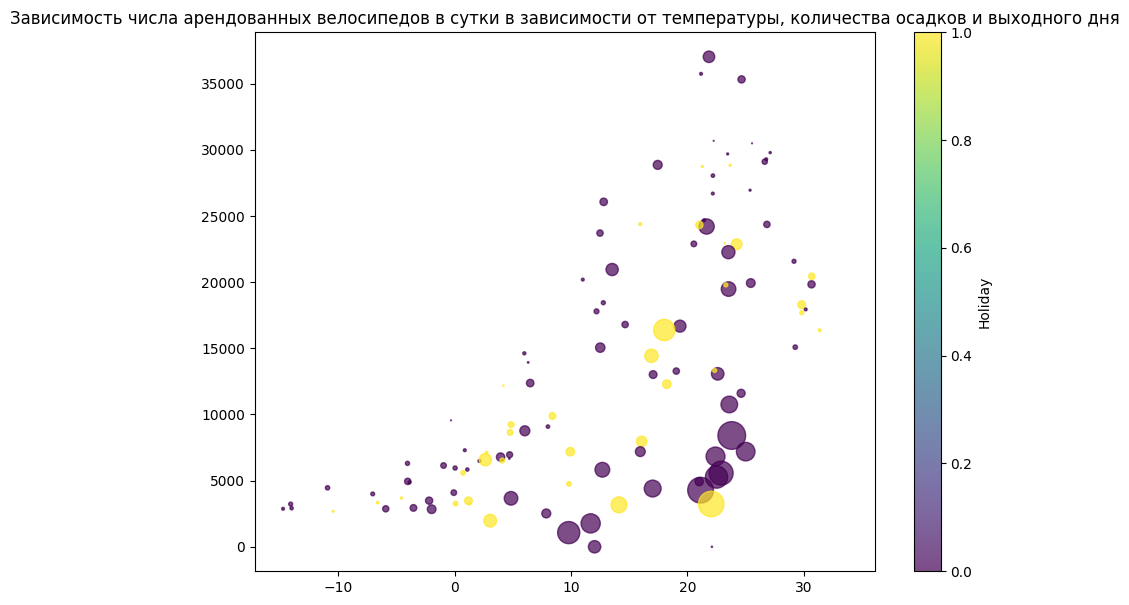

In [34]:
fig, ax = plt.subplots(figsize=(10,7))
graph = ax.scatter(bikes_date['Temperature'], bikes_date['Rental Count'], 
           c=bikes_date['No_work_day'], 
           s=bikes_date['Precipitation'] * 10,
          alpha=0.7)
#s - size of a point (*10 so that the points become more visible); c - color of a point; alpha - transparancy of a point (0 - fully transparent)
plt.colorbar(graph, label='Holiday')
ax.set_title('Зависимость числа арендованных велосипедов в сутки в зависимости от температуры, количества осадков и выходного дня')

In [35]:
fig.savefig('scatter.pdf')

<H3>Test</H3>

In [92]:
court_df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/6ff383af28f9f0252f8ae0a6a4ebd6bf/asset-v1:hse+STATDA+2021+type@asset+block/TenthCircuit.csv')
court_df

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category
0,Hansen v. SkyWest Airlines,12/21/16,1,Briscoe,McKay,Matheson,1,1,1,Title VII
1,Hansen v. SkyWest Airlines,12/21/16,2,Briscoe,McKay,Matheson,0,0,0,Title VII
2,Glapion v. Jewell,12/14/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII
3,Dye v. Moniz,12/06/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII
4,"Lister v. City of Wichita, Kansas",11/15/16,1,Lucero,Matheson,Bacharach,0,0,0,Title VII
...,...,...,...,...,...,...,...,...,...,...
949,Haimour v. Gonzales,01/31/06,1,Henry,McKay,Murphy,0,0,0,Immigration
950,Infanzon v. Gonzales,01/24/06,1,Henry,McKay,Murphy,0,0,0,Immigration
951,Otero v. Gonzales,01/24/06,1,Tymkovich,Porfilio,Baldock,0,0,0,Immigration
952,Infanzon v. Comfort,01/18/06,1,Briscoe,Lucero,Murphy,0,0,0,Immigration


<B>Описание данных</B>
<br>– Title — название дела, рассматриваемого в суде
<br>– Date — дата вынесения решения
<br>– Issue — номер заседания
<br>– Judge1, Judge2, Judge3 — имена судей
<br>– Vote1, Vote2, Vote3 — голос судьи (либеральный = 1, консервативный = 0)
<br>– Category — категория дела

In [135]:
court_df['Date'] = pd.to_datetime(court_df['Date'])
court_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     954 non-null    object        
 1   Date      954 non-null    datetime64[ns]
 2   Issue     954 non-null    int64         
 3   Judge1    954 non-null    object        
 4   Judge2    954 non-null    object        
 5   Judge3    954 non-null    object        
 6   Vote1     954 non-null    int64         
 7   Vote2     954 non-null    int64         
 8   Vote3     954 non-null    int64         
 9   Category  954 non-null    object        
 10  Season    954 non-null    object        
 11  liberal   954 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(6)
memory usage: 85.8+ KB


<H4>Вопрос 1-1</H4>Какой график лучше всех подойдет для визуализации тренда суммарного количества всех рассмотренных дел за каждый год?

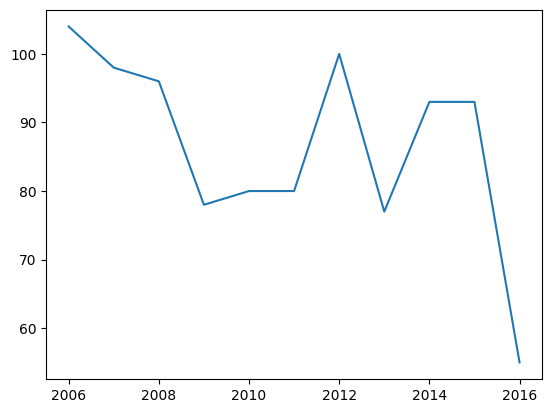

In [136]:
res = court_df.groupby(court_df['Date'].dt.year)['Title'].count()
plt.plot(res)

(array([1., 0., 0., 0., 2., 2., 0., 2., 2., 2.]),
 array([ 55. ,  59.9,  64.8,  69.7,  74.6,  79.5,  84.4,  89.3,  94.2,
         99.1, 104. ]),
 <BarContainer object of 10 artists>)

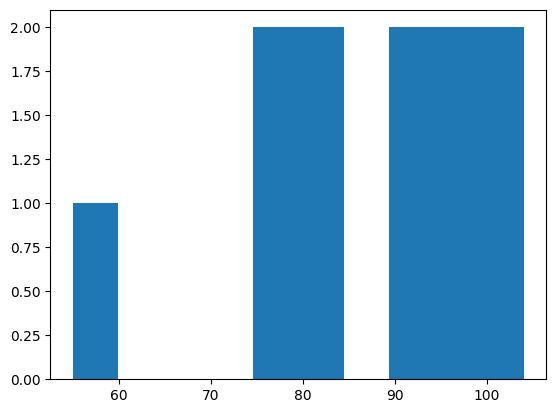

In [137]:
plt.hist(res)

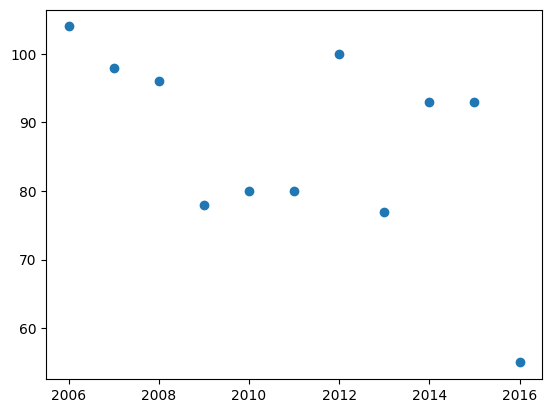

In [138]:
plt.scatter(res.index, res)

<Axes: xlabel='Date'>

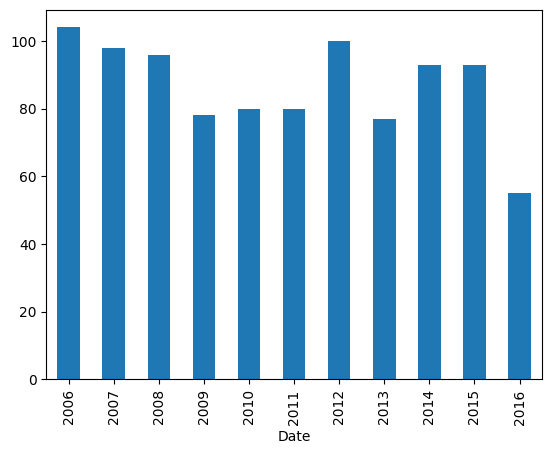

In [139]:
res.plot.bar(x=res.index, y=res)

<H4>Вопрос 1-2</H4>Укажите, верно ли следующее утверждение: для визуализации суммарного количества дел по каждой категории (переменная Category) подойдет столбчатая диаграмма

In [140]:
cases_by_category = court_df.groupby('Category')['Title'].count()
cases_by_category

Category
Immigration    554
Title VII      400
Name: Title, dtype: int64

<Axes: xlabel='Category'>

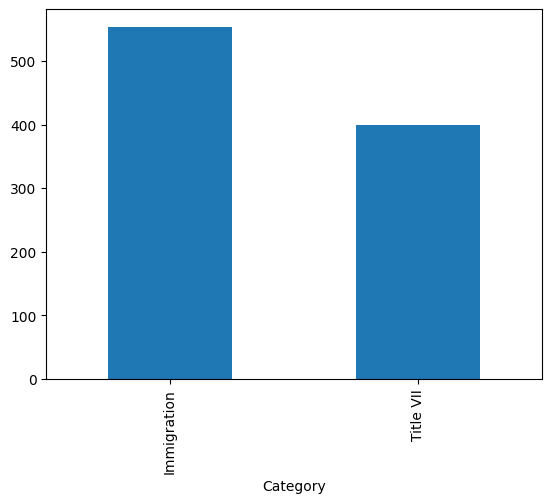

In [141]:
cases_by_category.plot.bar()

<H4>Вопрос 1-3</H4>Выберите только те наблюдения, где все судьи голосовали одинаково. (Сгруппировать по категории) <br> Выбрать правилный ответ:<br> - В обеих категориях больше заседаний, где судьи голосовали консервативно. <br> - В обеих категориях больше заседаний, где судьи голосовали либерально. <br> - В категории Title VII больше заседаний, где судьи голосовали консервативно, в категории Immigration, наоборот, — либерально. <br> -В категории Title VII больше заседаний, где судьи голосовали либерально, в категории Immigration, наоборот, — консервативно.

<br>(либеральный = 1, консервативный = 0)

In [142]:
equal_votes = court_df[(court_df['Vote1'] == court_df['Vote2']) & (court_df['Vote1'] == court_df['Vote3'])]
equal_votes.groupby('Category')['Vote1'].value_counts()

Category     Vote1
Immigration  0        500
             1         47
Title VII    0        328
             1         59
Name: Vote1, dtype: int64

<H4>Вопрос 1-4</H4>Выберите заседания только за 2016 год. Постройте линейный график и определите, в каких месяцах наблюдались пиковые значения по числу заседаний. Будьте внимательны — даты записаны в формате месяц/день/год. Выберите один верный ответ.

In [ ]:
res = court_df[court_df['Date'].dt.year == 2016].groupby(court_df['Date'].dt.month)['Title'].count()
plt.plot(res)

<H4>Вопрос 1-6</H4>Используя исходные данные, определите среднее число заседаний за каждый сезон (зима, весна, лето, осень). Постройте столбчатую диаграмму, определите месяц с наибольшим показателем. Будьте внимательны — даты записаны в формате месяц/день/год. Введите ответ в виде слова (например, осень).

In [94]:
seasons = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter']
month_to_season = dict(zip(range(1,13), seasons))
court_df['Season'] = court_df['Date'].dt.month.map(month_to_season)
court_df.head()

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,Season
0,Hansen v. SkyWest Airlines,2016-12-21,1,Briscoe,McKay,Matheson,1,1,1,Title VII,Winter
1,Hansen v. SkyWest Airlines,2016-12-21,2,Briscoe,McKay,Matheson,0,0,0,Title VII,Winter
2,Glapion v. Jewell,2016-12-14,1,Lucero,Holmes,Moritz,0,0,0,Title VII,Winter
3,Dye v. Moniz,2016-12-06,1,Lucero,Holmes,Moritz,0,0,0,Title VII,Winter
4,"Lister v. City of Wichita, Kansas",2016-11-15,1,Lucero,Matheson,Bacharach,0,0,0,Title VII,Autumn


In [ ]:
res = court_df.groupby('Season')['Title'].count()
res.plot(kind='bar')

In [ ]:
 court_df['Date'].dt.month.nunique()

<H4>Вопрос 1-7</H4>Выберите только заседания по категории иммиграции. Постройте столбчатую диаграмму по суммарному числу заседаний, на котором присутствовал каждый судья. В ответ запишите имя судьи, который принимал участие в наибольшем количестве заседаний (например, Holmes).

In [ ]:
judge1 = court_df[court_df['Category'] == 'Immigration'].groupby('Judge1')['Title'].count()
judge2 = court_df[court_df['Category'] == 'Immigration'].groupby('Judge2')['Title'].count()
judge3 = court_df[court_df['Category'] == 'Immigration'].groupby('Judge3')['Title'].count()
all_judges = pd.concat([judge1, judge2, judge3], axis=1)
all_judges['total'] = all_judges.iloc[:, 0] + all_judges.iloc[:, 1] + all_judges.iloc[:, 2]
all_judges.sort_values(by='total', ascending=False)
all_judges['total'].plot(kind='bar')

<H4>Вопрос 1-8</H4>Определите, какие дела (переменная Title) рассматривались чаще всего. Постройте столбчатую диаграмму по суммарному числу таких заседаний, на котором присутствовал каждый судья. В ответ запишите имя судьи, который принимал участие в наибольшем количестве заседаний (например, Holmes).

<Axes: >

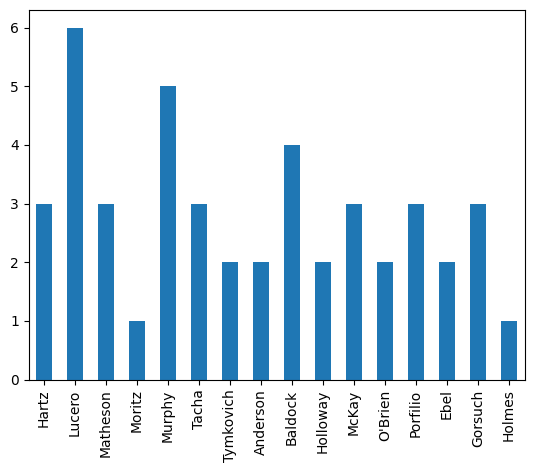

In [105]:
num = court_df.groupby('Title')['Date'].count().reset_index()
res = pd.merge(court_df, num, on='Title')
res = res.rename(columns={'Date_y': 'count'})
judge1 = res[res['count'] == res['count'].max()].groupby('Judge1')['Title'].count()
judge2 = res[res['count'] == res['count'].max()].groupby('Judge2')['Title'].count()
judge3 = res[res['count'] == res['count'].max()].groupby('Judge3')['Title'].count()
ans = pd.concat([judge1, judge2, judge3], axis=1)
ans['total'] = ans.sum(axis=1)
ans['total'].plot(kind='bar')

<H4>Вопрос 1-9</H4>Обратите внимание на то, как в каждом деле голосовали судьи. Постройте столбчатую диаграмму и определите, каких решений, принятых большинством (2 и более) голосов, больше. Укажите, верно ли следующее утверждение: решений, где большинство судей голосовало консервативно, больше.
 <br>Vote1, Vote2, Vote3 — голос судьи (либеральный = 1, консервативный = 0)

<Axes: xlabel='liberal'>

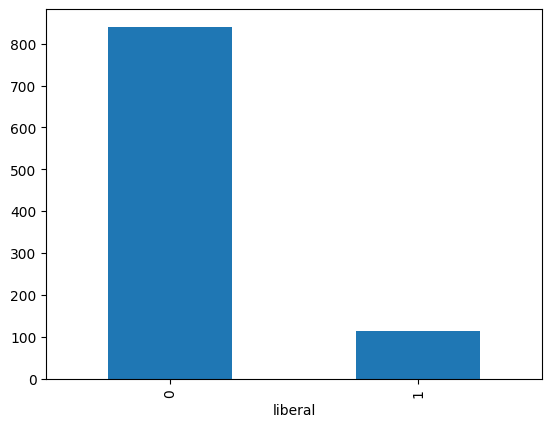

In [120]:
court_df['liberal'] = ((court_df['Vote1'] + court_df['Vote2'] + court_df['Vote3']) >= 2).astype(int)
res = court_df.groupby('liberal')['Title'].count()
res.plot(kind='bar')

<H4>Вопрос 1-10</H4>Выберите только те заседания, в которых участвовал судья Lucero. Постройте линейный график и определите, в каком году он участвовал в заседаниях меньше всего. Будьте внимательны — даты записаны в формате месяц/день/год. В ответ запишите целое число (например, 2016).

<Axes: xlabel='Date'>

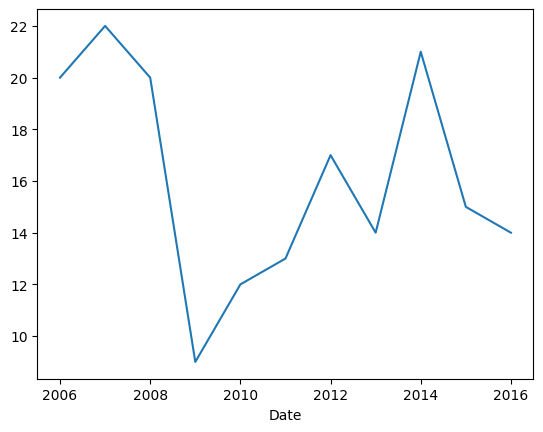

In [134]:
Lucero_issues = court_df[(court_df['Judge1']  == 'Lucero')| (court_df['Judge2']  == 'Lucero') | (court_df['Judge3'] == 'Lucero')]
Lucero_issues.groupby(Lucero_issues['Date'].dt.year)['Title'].count().plot()

<H3>Тест Продвинутая визуализация</H3> 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/602c0edd7a26c6611744a380a3130736/asset-v1:hse+STATDA+2021+type@asset+block/UrbanizationCensusTract.csv', index_col=0)
df

,statefips,state,gisjoin,lat_tract,long_tract,population,adj_radiuspop_5,urbanindex,log_pop
0,1,Alabama,G0100010020100,32.47718,-86.49007,1845,44076.0,10.69367,7.520235
1,1,Alabama,G0100010020200,32.47425,-86.47337,2172,43008.0,10.66914,7.683404
2,1,Alabama,G0100010020300,32.47543,-86.46019,3385,38987.0,10.57098,8.127109
3,1,Alabama,G0100010020400,32.47200,-86.44363,4267,43131.0,10.67200,8.358666
4,1,Alabama,G0100010020500,32.45883,-86.42266,9965,43131.0,10.67200,9.206834
...,...,...,...,...,...,...,...,...,...
73275,72,Puerto Rico,G7201530750501,18.03124,-66.86725,6011,52155.0,10.86198,8.701346
73276,72,Puerto Rico,G7201530750502,18.02477,-66.86044,2342,55257.0,10.91975,7.758761
73277,72,Puerto Rico,G7201530750503,18.02527,-66.87763,2218,48423.0,10.78773,7.704361
73278,72,Puerto Rico,G7201530750601,18.01738,-66.83936,4380,50600.0,10.83171,8.384804


– statefip — намер штата США или территории в ведение США
– state — название штата или территории
– gisjoin — номер переписного района согласно данным переписи 2010 года
– lat_tract, long_tract — широта и долгота центра переписного района
– population — число жителей переписного района
– adj_radiuspop_5 — оцененное значение числа жителей в радиусе пяти миль от переписного пункта
– urbanindex — индекс того, насколько городской или сельской является данный район
– log_pop — логарифм населения переписного пункта


<H4>Вопрос 1</H4>Какой график лучше всех подойдет для визуализации распределения переменной urbanindex? Выберите один верный ответ.

(array([6.0000e+00, 1.2000e+01, 1.0800e+02, 8.7500e+02, 5.1610e+03,
        5.5010e+03, 9.9440e+03, 2.1522e+04, 2.5350e+04, 4.8010e+03]),
 array([-0.2977678 ,  1.23173198,  2.76123176,  4.29073154,  5.82023132,
         7.3497311 ,  8.87923088, 10.40873066, 11.93823044, 13.46773022,
        14.99723   ]),
 <BarContainer object of 10 artists>)

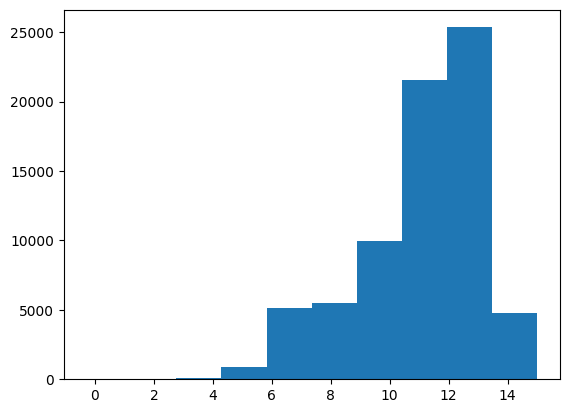

In [4]:
plt.hist(df['urbanindex'])

<H4>Вопрос 2</H4>Укажите, верно ли следующее утверждение: для определения выбросов и аномальных значений в переменной population подойдет ящик с усами.

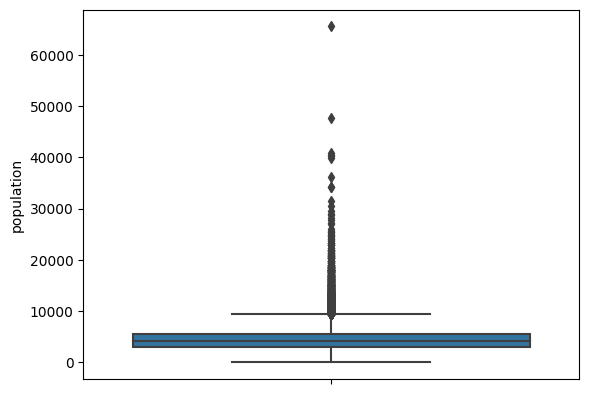

In [20]:
sns.boxplot(y=df['population'])
plt.show()

(array([6.3341e+04, 9.5760e+03, 2.9400e+02, 5.1000e+01, 9.0000e+00,
        3.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.00000e+00, 6.55460e+03, 1.31072e+04, 1.96598e+04, 2.62124e+04,
        3.27650e+04, 3.93176e+04, 4.58702e+04, 5.24228e+04, 5.89754e+04,
        6.55280e+04]),
 <BarContainer object of 10 artists>)

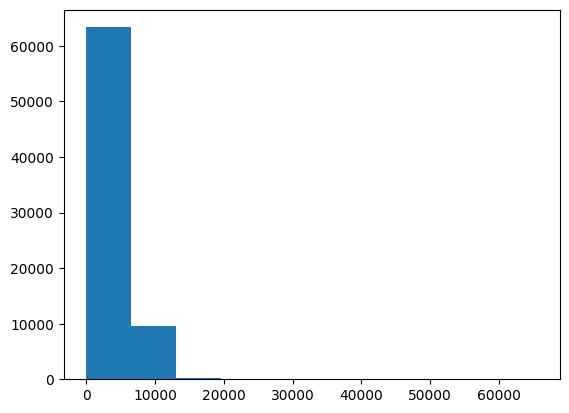

In [10]:
plt.hist(df['population'])

<H4>Вопрос 3</H4>Укажите, верно ли следующее утверждение: для визуализации распределения числа жителей каждого переписного района Аляски лучше всего подойдет гистограмма.

<Axes: >

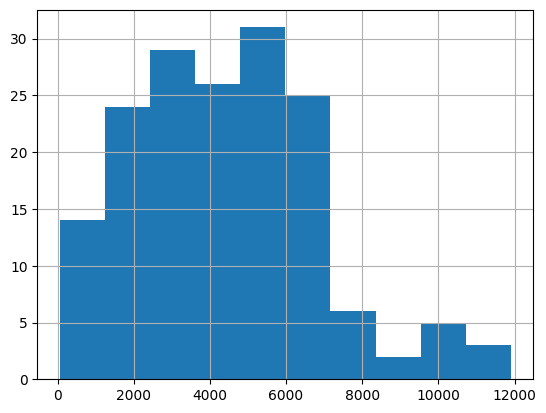

In [18]:
df[(df['state'] == 'Alaska')]['population'].hist()

<H4>Вопрос 4</H4>Постройте ящики с усами для каждого из указанных штатов по переменной urbanindex. Выберите штат, в котором нет выбросов по данной переменной. Выберите один верный ответ.

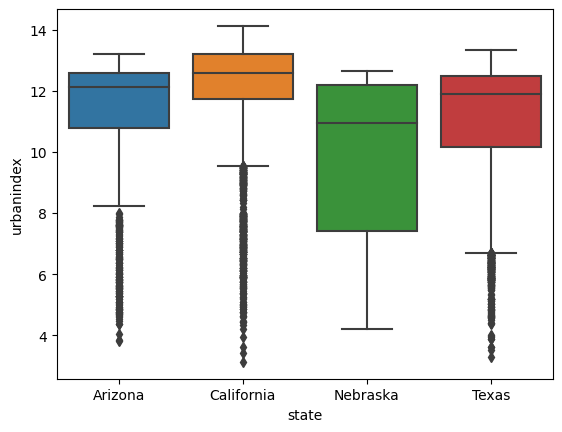

In [29]:
sns.boxplot(x=df[df['state'].isin(['California', 'Nebraska', 'Arizona', 'Texas'])]['state'], y=df['urbanindex'])
plt.show()

<H4>Вопрос 5</H4>Постройте тепловую карту по переменным population, adj_radiuspop_5 и urbanindex. Какой вывод можно сделать на основе полученных данных? Выберите один верный ответ.

пример:
fig , ax = plt.subplots(figsize = (14,12))

correlation = df.corr().loc[cols_num, cols_num]

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,
            linecolor="white", annot_kws = {'size':12})

C:\Users\KDK\AppData\Local\Temp\ipykernel_8948\1506949770.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().loc[['population', 'adj_radiuspop_5', 'urbanindex'], ['population', 'adj_radiuspop_5', 'urbanindex']]


<Axes: >

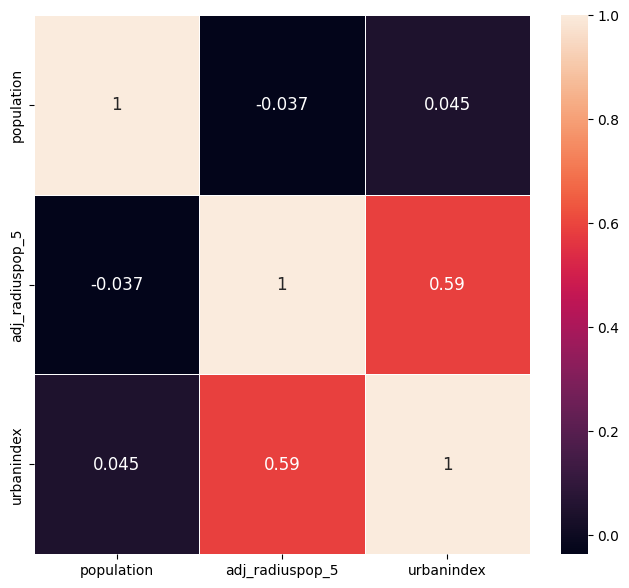

In [34]:
correlation = df.corr().loc[['population', 'adj_radiuspop_5', 'urbanindex'], ['population', 'adj_radiuspop_5', 'urbanindex']]
fig, ax = plt.subplots(figsize = (8, 7))

sns.heatmap(correlation,
           linewidths=0.5, annot=True,
            linecolor="white", annot_kws = {'size':12})

<H4>Вопрос 6</H4>Посмотрите на штаты Аляска (Alaska), Оклахома (Oklahoma), Северная Дакота (North Dakota) и Монтана (Montana). Сколько из указанных штатов не содержат выбросы по переменной population? Попробуйте построить ящики с усами для каждого штата и ответить на вопрос. Введите ответ в виде целого числа.

<Axes: xlabel='state', ylabel='population'>

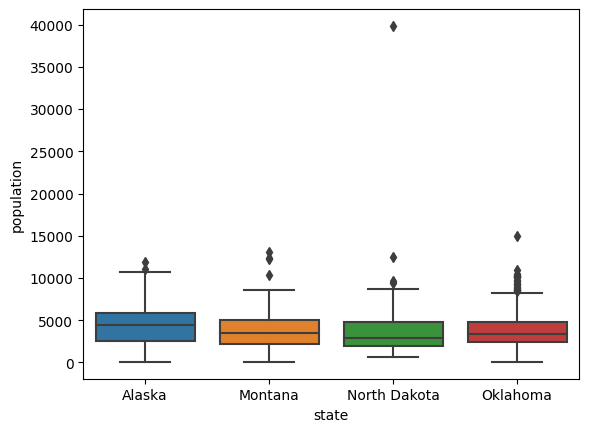

In [36]:
sns.boxplot(x= df[df['state'].isin(['Alaska', 'Oklahoma', 'North Dakota', 'Montana'])]['state'], y=df['population'])

<H4>Вопрос 7</H4>Постройте гистограмму для переменной urbanindex в штате Оклахома. Укажите, верно ли следующее утверждение: в штате Оклахома (Oklahoma) переменная urbanindex распределена нормально.

<Axes: xlabel='urbanindex', ylabel='Count'>

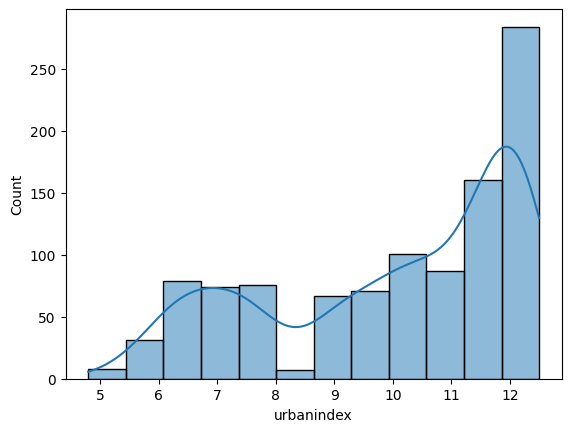

In [39]:
sns.histplot(df[df['state'] == 'Oklahoma']['urbanindex'], kde=True)

<H4>Вопрос 8</H4>Укажите, верно ли следующее утверждение: при построении ящика с усами для Канзаса (Kansas) и Кентукки (Kentucky) по переменной urbanindex мы увидим одинаковое количество выбросов.

<Axes: xlabel='state', ylabel='urbanindex'>

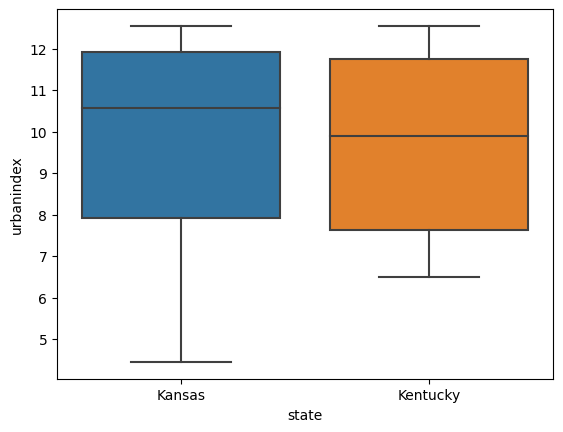

In [40]:
sns.boxplot(x= df[df['state'].isin(['Kansas', 'Kentucky'])]['state'], y=df['urbanindex'])

<H4>Вопрос 9</H4>Постройте тепловую карту и определите, в каком штате сильнее всего коррелируют показатели population и adj_radiuspop_5? В ответ запишите номер штата (согласно столбцу statefips).

In [69]:
res = []
for state in df['state'].unique():
    res.append(df[df['state'] == state].corr()['population'].rename(state))
res = pd.concat(res, axis=1)    

res.loc['adj_radiuspop_5'].sort_values(ascending=False)

C:\Users\KDK\AppData\Local\Temp\ipykernel_8948\3133834553.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  res.append(df[df['state'] == state].corr()['population'].rename(state))


Montana                 0.272313
South Dakota            0.248568
Vermont                 0.243049
North Dakota            0.238687
Idaho                   0.225128
Alaska                  0.215601
Arkansas                0.100046
Nebraska                0.095743
Maine                   0.090969
Iowa                    0.088780
Washington              0.088292
District of Columbia    0.072961
New Hampshire           0.058672
Oregon                  0.048539
Colorado                0.039581
Rhode Island            0.027268
New Mexico              0.025767
Florida                 0.018896
Kansas                  0.017671
New York                0.016598
Wyoming                 0.007016
Texas                   0.002168
Georgia                -0.005344
Arizona                -0.016303
Kentucky               -0.033833
Nevada                 -0.034374
New Jersey             -0.038383
Pennsylvania           -0.041838
North Carolina         -0.043747
South Carolina         -0.050170
Utah      

<Axes: >

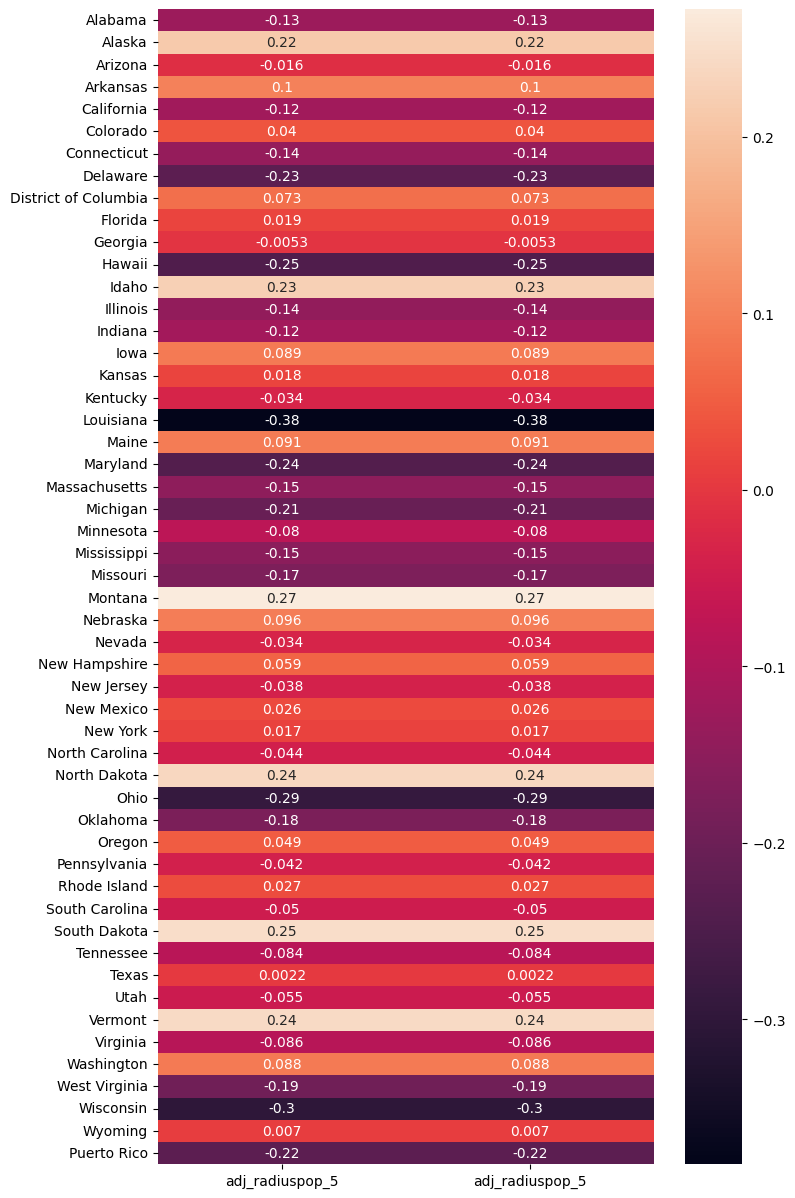

In [77]:
fig, ax = plt.subplots(figsize = (8, 15))
sns.heatmap(res.loc[['adj_radiuspop_5', 'adj_radiuspop_5']].transpose(), annot=True)